# Astropy Affiliated Packages: [`astroquery`](https://astroquery.readthedocs.io) and [`astroplan`](https://astroplan.readthedocs.io/en/latest/)
<br /><br />

![astropy logo](http://astropy.readthedocs.org/en/stable/_images/astropy_banner.svg)

<br /><br />

## Table of contents
* [astroquery](#astroquery)
  * [SIMBAD queries](#simbad)
  * [Vizier queries](#vizier)
* [astroplan](#astroplan)
  * [Intro to astroplan](#introastroplan)
  * [Constraints](#constraints)


<br /><br />

#### What is an [affiliated package](http://www.astropy.org/affiliated/)?

From the astropy webpage: 

> A major part of the Astropy Project is the concept of “Affiliated Packages”... These packages demonstrate a commitment to Astropy’s goals of **improving reuse, interoperability, and interface standards** for Python astronomy and astrophysics packages. 

Astropy's goal is to be a core package for astronomy in Python. Affiliated packages extend the reach of astropy into specific niches not already supported by astropy. 

#### Abbreviated package census
are too many affiliated pacakges to go over them all in my 20 minute slot, so I'm going to focus on two in this talk. But be sure to check out these others: 

* Cosmic ray detection in images [astroscrappy](https://github.com/astropy/astroscrappy)
* CCD data processing with [ccdproc](https://github.com/astropy/ccdproc)
* Linked data visualization with [glue](https://github.com/glue-viz/glue)
* Photometry tools from [photutils](https://github.com/astropy/photutils.git)
* Astronomical image reprojection with [reproject](https://github.com/astrofrog/reproject)

...and more! See a complete list of affiliated packages [here](http://www.astropy.org/affiliated/).

#### Starting your own affiliated package

If you'd like to make your own package astropy affiliated, you can quickly make your pacakge conform to the astropy affiliated package standards by using the [package-template](https://github.com/astropy/package-template), which sets your package up for testing and documentation.

***


# [`astroquery`](https://astroquery.readthedocs.io) <a id='astroquery'></a>



`astroquery` allows you to query astronomical databases with ease. 

### SIMBAD: [`astroquery.simbad`](http://astroquery.readthedocs.io/en/latest/simbad/simbad.html)<a id='simbad'></a>


Suppose you're about to observe the exoplanet host star HD 189733, and you'd like to know its: 

* position
* $B$ and $V$ colors
* spectral type

All of this information is easily accessible via the [SIMBAD Astronomical Database](http://simbad.u-strasbg.fr).

Let's query for the SIMBAD for this object (a star):

In [16]:
from astroquery.simbad import Simbad

identifier = 'HD 189773'

result = Simbad.query_object(identifier)
result

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
HD 189773,20 05 10.8954,-61 30 25.967,8,8,62.600,55.680,90,B,,1998A&A...335L..65H


You can see that some basic information is returned in an [`Table`](http://docs.astropy.org/en/stable/table/) object. We can create an [`SkyCoord`](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord) object to describe its position by accessing the `ra` and `dec` columns:

In [14]:
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u

# Use astropy.coordinates.Angle class to parse the position strings:
ra = Angle(result['RA'][0], u.hourangle)
dec = Angle(result['DEC'][0], u.degree)

# Initialize a astropy.coordinates.SkyCoord object for HD 189733
position = SkyCoord(ra=ra, dec=dec)

print(position)

<SkyCoord (ICRS): (ra, dec) in deg
    ( 301.2953975, -61.50721306)>


The default SIMBAD query table includes position and proper motion, but doesn't include the colors and spectral type. You can add custom query parameters if you know their field names, [which are defined here](http://simbad.u-strasbg.fr/simbad/sim-help?Page=sim-fscript#VotableFields):

In [19]:
from astroquery.simbad import Simbad

# We're going to create a custom instance of the SIMBAD class:
s = Simbad()

# We're going to add fields to the VOTable for spectral type:
s.add_votable_fields('sptype')

# ...and for the B and V magnitudes: 
s.add_votable_fields('flux(B)')
s.add_votable_fields('flux(V)')

# Now let's query for the object on our new SIMBAD instance:
result = s.query_object(identifier)
result

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SP_TYPE,SP_QUAL,SP_BIBCODE,FLUX_B,FLUX_V
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,,mag,mag
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,object,str1,object,float32,float32
HD 189773,20 05 10.8954,-61 30 25.967,8,8,62.600,55.680,90,B,,1998A&A...335L..65H,K0/1III,D,1975MSS...C01....0H,11.01,9.75


The properties we requested are listed in the columns `SP_TYPE`, `FLUX_B` and `FLUX_V`.

In [26]:
sptype = result['SP_TYPE'][0].decode()
b = result['FLUX_B'][0]
v = result['FLUX_V'][0]

print("Spectral type: {0}".format(sptype))
print("B = {0}".format(b))
print("V = {0}".format(v))

Spectral type: K0/1III
B = 11.010000228881836
V = 9.75


### Vizier: [`astroquery.vizier`](http://astroquery.readthedocs.io/en/latest/vizier/vizier.html)<a id='vizier'></a>

Let's query Vizier for the famous list of standard stars from [Landolt (1992)](http://adsabs.harvard.edu/abs/1992AJ....104..340L). The [`Table`](http://astropy.readthedocs.io/en/latest/table/) that is returned to you will have the same information as [this Vizier query page](http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=II/183A/table2).

In [30]:
from astroquery.vizier import Vizier

# Generic search using author and year format:
table_list = Vizier.get_catalogs('Landolt 1992')

table_list

TableList with 3 tables:
	'0:II/183A/table2' with 15 column(s) and 50 row(s) 
	'1:II/183A/filters' with 6 column(s) and 50 row(s) 
	'2:II/183A/table11' with 3 column(s) and 50 row(s) 

What gets returned is a `TableList` object, containing all of the tables that matched our (vague) query. You can see that astroquery will return the first 50 rows of each table by default. 

You could also search for a specific table by its catalog identifier, which is "II/183A/table2" for this table. We could have searched via catalog ID like this: 

In [28]:
identifier = 'II/183A/table2'

Vizier.get_catalogs(catalog=identifier)

TableList with 1 tables:
	'0:II/183A/table2' with 15 column(s) and 50 row(s) 

There's only one table this time, because this identifier is unique. Now let's get all rows of the table, instead of the first 50: 

In [31]:
# Set the row limit to a very large number:
Vizier.ROW_LIMIT = 1e10

# Get the first table:
result = Vizier.get_catalogs(catalog=identifier)[0]

result

RAJ2000,DEJ2000,Vmag,e_Vmag,B-V,e_B-V,U-B,e_U-B,V-R,e_V-R,R-I,e_R-I,V-I,e_V-I,SimbadName
"""h:m:s""","""d:m:s""",mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,
bytes8,bytes9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes18
00 30 09,-46 31 22,14.651,0.0028,0.793,0.0046,0.380,0.0071,0.435,0.0019,0.405,0.0035,0.841,0.0032,[L92b] TPHE A
00 30 16,-46 27 55,12.334,0.0115,0.405,0.0026,0.156,0.0039,0.262,0.0020,0.271,0.0019,0.535,0.0035,[L92b] TPHE B
00 30 17,-46 32 34,14.376,0.0022,-0.298,0.0024,-1.217,0.0043,-0.148,0.0038,-0.211,0.0133,-0.360,0.0149,[L92b] TPHE C
00 30 18,-46 31 11,13.118,0.0033,1.551,0.0030,1.871,0.0118,0.849,0.0015,0.810,0.0023,1.663,0.0030,[L92b] TPHE D
00 30 19,-46 24 36,11.630,0.0017,0.443,0.0012,-0.103,0.0024,0.276,0.0007,0.283,0.0015,0.564,0.0019,[L92b] TPHE E
00 30 50,-46 33 33,12.474,0.0004,0.855,0.0058,0.532,0.0161,0.492,0.0004,0.435,0.0040,0.926,0.0036,[L92b] TPHE F
00 31 05,-46 22 43,10.442,0.0004,1.546,0.0013,1.915,0.0036,0.934,0.0004,1.085,0.0009,2.025,0.0009,[L92b] TPHE G
00 31 50,+02 38 26,15.268,0.0094,0.362,0.0174,-0.184,0.0112,0.251,0.0161,0.337,0.0125,0.593,0.0067,PG0029+024


This returns all 526 standard stars in the table. Let's see the distribution of colors, and the distribution on the sky:

(array([   7.,    0.,    0.,    0.,    1.,   11.,   23.,  439.,   31.,   14.]),
 array([-46.55916667, -40.3145    , -34.06983333, -27.82516667,
        -21.5805    , -15.33583333,  -9.09116667,  -2.8465    ,
          3.39816667,   9.64283333,  15.8875    ]),
 <a list of 10 Patch objects>)

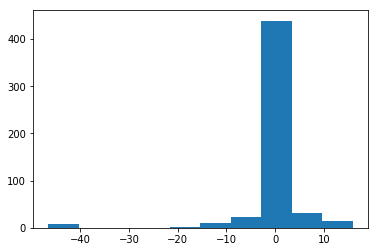

In [77]:
plt.hist(dec.deg)

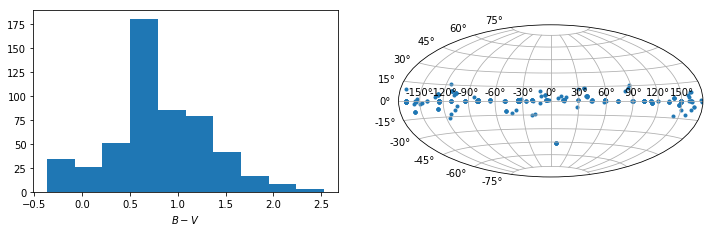

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 5))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='hammer')

# Plot histogram of B-V colors
ax0.hist(result['B-V'])
ax0.set_xlabel('$B-V$')
ax0.set_aspect(1e-2)

# Plot sky positions
ra = Angle(result['RAJ2000'], u.hourangle).wrap_at(np.pi*u.rad)
dec = Angle(result['DEJ2000'], u.degree)
ax1.scatter(ra.radian, dec.radian, marker='.')
ax1.grid()
plt.show()

<br />
*** 
<br />

# [`astroplan`](https://astroplan.readthedocs.org/en/latest/) <a id='astroplan'></a>


`astroplan` is an `astropy`-affiliated package that helps you calculate when objects are observable from observatories on the Earth (Morris et al. 2017, submitted).

### Intro to astroplan <a id='introastroplan'></a>

You can describe an observatory using the [`Observer`](https://astroplan.readthedocs.io/en/latest/api/astroplan.Observer.html#astroplan.Observer) object, which knows about famous observatories:

In [90]:
from astroplan import Observer

# Use the `at_site` method to access famous observatories
salt = Observer.at_site('SALT')
keck = Observer.at_site('Keck')

from astropy.coordinates import EarthLocation
print("Available observatories: \n\n{0}"
      .format(', '.join(EarthLocation.get_site_names())))

Available observatories: 

, , , ALMA, Anglo-Australian Observatory, Apache Point, Apache Point Observatory, Atacama Large Millimeter Array, BAO, Beijing XingLong Observatory, Black Moshannon Observatory, CHARA, Canada-France-Hawaii Telescope, Catalina Observatory, Cerro Pachon, Cerro Paranal, Cerro Tololo, Cerro Tololo Interamerican Observatory, DCT, Discovery Channel Telescope, Dominion Astrophysical Observatory, Gemini South, Hale Telescope, Haleakala Observatories, Happy Jack, Jansky Very Large Array, Keck Observatory, Kitt Peak, Kitt Peak National Observatory, La Silla Observatory, Large Binocular Telescope, Las Campanas Observatory, Lick Observatory, Lowell Observatory, Manastash Ridge Observatory, McDonald Observatory, Medicina, Medicina Dish, Michigan-Dartmouth-MIT Observatory, Mount Graham International Observatory, Mt Graham, Mt. Ekar 182 cm. Telescope, Mt. Stromlo Observatory, Multiple Mirror Telescope, NOV, National Observatory of Venezuela, Noto, Observatorio Astronomico N

You can also specify observatories not included in the database using an [`EarthLocation`](http://docs.astropy.org/en/stable/api/astropy.coordinates.EarthLocation.html) object:

In [102]:
from astropy.coordinates import EarthLocation

latitude = -33.9249*u.deg
longitude = 18.4241*u.deg
elevation = 0*u.m

# Specify the location of Cape Town:
location = EarthLocation.from_geodetic(longitude, latitude, elevation)

# Make an observer at Cape Town:
cape_town = Observer(location=location, pressure=1*u.bar, temperature=20*u.deg_C)

cape_town

<Observer: location (lon, lat, el)=(18.4241 deg, -33.9249 deg, 0.0 m),
    timezone=<UTC>,
    pressure=<Quantity 1.0 bar>,
    temperature=<Quantity 20.0 deg_C>>

The pressure and temperature will be used in calculations for atmospheric refraction when computing the altitude and azimuth of targets.

We define a target in the sky with a `FixedTarget` object, which simply contains a `SkyCoord` and a name:

In [103]:
from astroplan import FixedTarget
from astropy.coordinates import SkyCoord

coord = SkyCoord(ra='14h29m42.94853s', dec='-62d40m46.1631s', 
                 distance=4.224*u.lightyear)
proxima = FixedTarget(coord=coord, name='Proxima Cen')

We can use the `from_name` method to grab targets with their identifier, resolved via [Sesame](http://cds.u-strasbg.fr/cgi-bin/Sesame):

In [108]:
# Targets are stored as `astroplan.FixedTarget` objects
target_names = ['Proxima', 'LMC', 'SMC', 'alpha Mensa', 'Polaris']
targets = [FixedTarget.from_name(target) for target in target_names]

Let's see which of these targets is "up" ($>0^\circ$ altitude) now:

In [109]:
from astropy.time import Time

# Which targets are visible right now?
cape_town.target_is_up(Time.now(), targets)

array([ True,  True,  True,  True, False], dtype=bool)

Unsurprisingly, the circumpolar souther stars are up, and the circumpolar northern stars are up.

<br />
*** 
<br />

### [Constraints](http://astroplan.readthedocs.io/en/latest/tutorials/constraints.html) <a id='constraints'></a>

Often you will need to plan observations given various constraints, for example, you might need to observe: 
* Between civil twilights (sun at $<-6^\circ$ altitude)
* The target altitude must be $20^\circ < $alt$ < 85^\circ$ (or similar pointing limits for your telescope)
* The target is separated from the moon by at least $50^\circ$

`astroplan` provides a framework for defining these observing constraints, and computing whether or not targets are observable given those constraints. Let's implement the above list of constraints: 

In [177]:
from astroplan import (AtNightConstraint, AltitudeConstraint, 
                       MoonSeparationConstraint, MoonIlluminationConstraint)

constraints = [AtNightConstraint.twilight_civil(),
               AltitudeConstraint(min=20*u.deg, max=85*u.deg), 
               MoonSeparationConstraint(min=2*u.deg)]

In [178]:
def plot_constraints(observability_grid, constraints, time_grid, name):
    """
    Plot some constraints in a grid!
    """
    extent = [-0.5, -0.5+len(time_grid), -0.5,  -0.5+len(constraints)]

    fig, ax = plt.subplots()
    ax.imshow(observability_grid, extent=extent)

    ax.set_yticks(range(0, len(constraints)))
    ax.set_yticklabels([c.__class__.__name__ for c in constraints])

    ax.set_xticks(range(len(time_grid)))
    ax.set_xticklabels([t.datetime.strftime("%H:%M") for t in time_grid])

    ax.set_xticks(np.arange(extent[0], extent[1]), minor=True)
    ax.set_yticks(np.arange(extent[2], extent[3]), minor=True)

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    ax.tick_params(axis='x', which='minor', bottom='off')
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    ax.tick_params(axis='y', which='minor', left='off')
    ax.set_xlabel('Time on {0} UTC'.format(time_grid[0].datetime.date()))
    ax.set_title(name)
    fig.subplots_adjust(left=0.35, right=0.9, top=0.9, bottom=0.1)
    return fig, ax

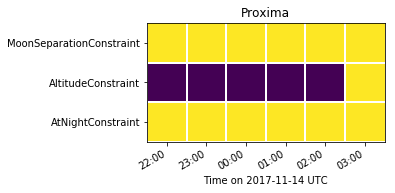

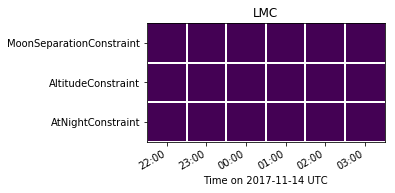

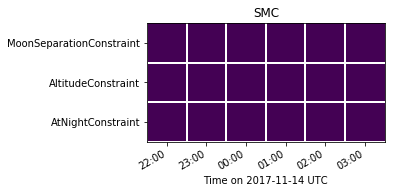

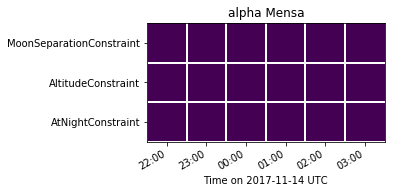

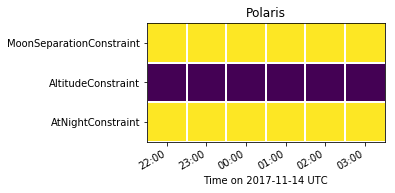

In [182]:
from astroplan.utils import time_grid_from_range

# Define range of times to observe between
start_time = Time('2017-11-14 22:00:01')
end_time = Time('2017-11-15 04:00:01')
time_resolution = 1 * u.hour

# Create grid of times from ``start_time`` to ``end_time``
# with resolution ``time_resolution``
time_grid = time_grid_from_range([start_time, end_time],
                                 time_resolution=time_resolution)

for target in targets: 
    observability_grid = np.zeros((len(constraints), len(time_grid)))

    for i, constraint in enumerate(constraints):
        # Evaluate each constraint
        observability_grid[i, :] = constraint(cape_town, target, times=time_grid)
    
    plot_constraints(observability_grid, constraints, time_grid, target.name)

In the above plot, grid squares that are purple represent times and constraints for which the target is observable, yellow is not observabable.

Another way to visualize whether or not a target meets the constraints is with the `observability_table` function:

In [184]:
from astroplan import observability_table
observability_table(constraints, cape_town, targets, times=time_grid)

target name,ever observable,always observable,fraction of time observable
str11,bool,bool,float64
Proxima,True,False,0.166666666667
LMC,True,True,1.0
SMC,True,True,1.0
alpha Mensa,True,True,1.0
Polaris,False,False,0.0


Let's track that target's motion through the sky for the next ten hours in a plot: 

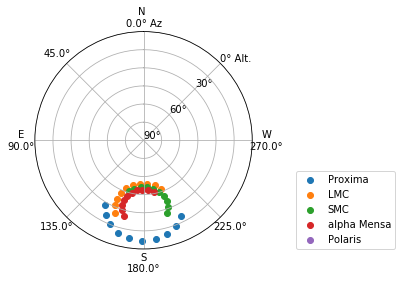

In [189]:
from astroplan.plots import plot_sky

# Plot at times: 
plot_times = Time.now() + np.linspace(0, 10, 10)*u.hour

for target in targets:
    plot_sky(target, cape_town, plot_times)
plt.legend(loc=[1.2, 0])

Perhaps you need to make a finder chart to help you find Proxima:

In [ ]:
from astroplan.plots import plot_finder_image

plot_finder_image(targets[0], fov_radius=5*u.arcmin, 
                  reticle=True, survey='2MASS-K')